In [2]:
import functions

In [3]:
import datetime

In [4]:
import nltk
import string

In [5]:
import re

In [6]:
import pickle

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [10]:
from collections import Counter

In [11]:
from imblearn.under_sampling import RandomUnderSampler

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# dataset used

In [13]:
#data during last 4 years when us gov and politics keyword was high
data = pd.read_csv('data/token_2017_2020.csv', index_col='_id')

In [14]:
%%time
df = data.copy()

CPU times: user 1.31 ms, sys: 545 µs, total: 1.86 ms
Wall time: 1.55 ms


In [15]:
df.shape

(17822, 9)

In [16]:
##create and filter "US POL AND GOV" keyword
df = functions.filter_keyword(df)

In [17]:
df.shape

(17822, 9)

In [18]:
#print corpus for inspection
df.text.iloc[0]

' as you drew closer to the fifth floor where      works out of a suite of offices things started to loosen up  assistant outside his conference room wore a mask but the other did not  the middle of the room with its oil paintings and vaulted ceiling the long central table had fewer chairs than you might expect and an appropriate distance between them  past the next door inside the attorney generals smaller personal office  himself was also mask-free  around to greet his visitors he moved into the middle of a wide circle of four chairs arranged in front of his desk  nearing the end of his career  did not take his current job for the glory  had already been attorney general once in      administration winning him a reputation as a wise old man a reputation that in the eyes of some his tenure in the  administration has tarnished  is he doing it for the money  time in corporate  earned him tens of millions of dollars in compensation and stock options and his bearing is still that of a  50

In [19]:
#last check of data before split
last_check_before_split = (df.iloc[0])
last_check_before_split

lead_paragraph                           On the first Monday in May, the Department of ...
keywords                                 [{'name': 'persons', 'value': 'Barr, William P...
pub_date                                                          2020-06-01T09:00:11+0000
type_of_material                                                                      News
print_page                                                                            20.0
text                                      as you drew closer to the fifth floor where  ...
United States Politics and Government                                                 True
quote_list                                                                            [[]]
keyword_list                             ['', 'Barr,', 'William', 'P', 'Justice', 'Depa...
Name: nyt://article/f5d2e4a7-f89b-54da-9985-dd5fc704a51e, dtype: object

# drop na

In [20]:
df.shape

(17822, 9)

In [21]:
df = df.dropna()

In [22]:
df.shape

(17783, 9)

News: 14592 Oped: 3191, Total: 17783, Op-Ed 0.18 of total


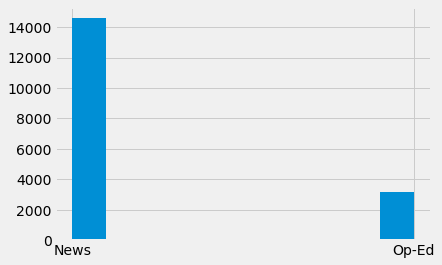

In [23]:
#return new counts, oped counts and total count w/ hist.
functions.oped_v_news(df)

# X, y

In [24]:
#define X. X is currently pandas series of unsplit strings
X = df.text

In [25]:
#turn series into list...
corpus = list(X)

In [26]:
corpus[0]

' as you drew closer to the fifth floor where      works out of a suite of offices things started to loosen up  assistant outside his conference room wore a mask but the other did not  the middle of the room with its oil paintings and vaulted ceiling the long central table had fewer chairs than you might expect and an appropriate distance between them  past the next door inside the attorney generals smaller personal office  himself was also mask-free  around to greet his visitors he moved into the middle of a wide circle of four chairs arranged in front of his desk  nearing the end of his career  did not take his current job for the glory  had already been attorney general once in      administration winning him a reputation as a wise old man a reputation that in the eyes of some his tenure in the  administration has tarnished  is he doing it for the money  time in corporate  earned him tens of millions of dollars in compensation and stock options and his bearing is still that of a  50

In [27]:
# define y as a series of op-ed or news
y = df.type_of_material

In [28]:
y.value_counts()

News     14592
Op-Ed     3191
Name: type_of_material, dtype: int64

In [29]:
y = functions.vectorize_y_ser(y)

In [31]:
y[0]

0

# remove stop words

# stemming/lemmatization

In [32]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [33]:
# %%time
# def snowball_tokenize(doc):
#     snowball = SnowballStemmer('english')
#     return [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [34]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [35]:
print(wordnet_tokenize(corpus[0])[:50])

['a', 'you', 'drew', 'closer', 'to', 'the', 'fifth', 'floor', 'where', 'work', 'out', 'of', 'a', 'suite', 'of', 'office', 'thing', 'started', 'to', 'loosen', 'up', 'assistant', 'outside', 'his', 'conference', 'room', 'wore', 'a', 'mask', 'but', 'the', 'other', 'did', 'not', 'the', 'middle', 'of', 'the', 'room', 'with', 'it', 'oil', 'painting', 'and', 'vaulted', 'ceiling', 'the', 'long', 'central', 'table']


# vectorizer

# WORDNET tfidf

In [36]:
import string

In [37]:
# nytimes_quotes = "”“"
# nytimes_punctuation = "—’"

In [38]:
setb = ['see', 'all', 'much', 'if', 'many', 'former', 'chief', 'spokesman', 'said']

In [39]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [40]:
stop_words = alphabet  + setb

In [41]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
                 preprocessor=functions.punc_strip, 
                 tokenizer=functions.wordnet_tokenize, 
#                 analyzer='word', 
                 stop_words=stop_words,
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 1), 
                 max_df=0.9, 
                 min_df=0.06, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 37 µs


# test, train, split

In [42]:
#test, train, split

In [43]:
%%time
print(datetime.datetime.now())
#test, train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

(13337,) (4446,) (13337,) (4446,)
CPU times: user 2min 15s, sys: 822 ms, total: 2min 16s
Wall time: 2min 17s


In [44]:
X_train.shape

(13337, 1190)

In [45]:
X_test.shape

(4446, 1190)

In [46]:
y_test[0]

0

# count vectorizer

In [43]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

# balance classes

In [47]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 2370), (1, 2370)]
RandomUnderSampler(random_state=0)
CPU times: user 11.2 ms, sys: 3.62 ms, total: 14.9 ms
Wall time: 13.5 ms


# random forest classifier

In [48]:
%%time
print(datetime.datetime.now())
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

2021-04-08 13:16:56.527026
CPU times: user 232 µs, sys: 82 µs, total: 314 µs
Wall time: 268 µs


In [49]:
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_test)
y_pred.shape

(4446,)

### metrics y_pred

In [47]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [48]:
print(y_test.shape)
print(y_pred.shape)

(4446,)
(4446,)


In [49]:
functions.metrics_(tn, fp, fn, tp)

Accuracy: 0.93
Recall: 0.92
Precision: 0.76
TN:3386 FP:239 FN:69 TP:752


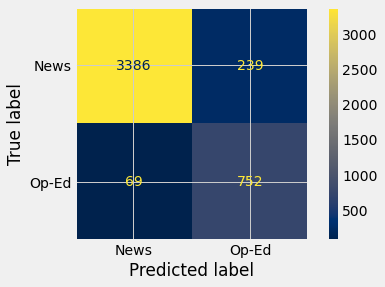

In [50]:
class_names = ["News", "Op-Ed"]
plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test,
                      display_labels=class_names,
                      cmap='cividis')
#plt.savefig('img/confusion_matrix.png');

# vectorizer parameters

In [51]:
#return parameters of tfdif vectorizer.
functions.print_vector_params(vectorizer)

Number of features: 1190, Numbers of stop words: 54973
analyzer: word
binary: False
decode_error: strict
dtype: <class 'numpy.float64'>
encoding: utf-8
input: content
lowercase: True
max_df: 0.9
max_features: None
min_df: 0.06
ngram_range: (1, 1)
norm: l2
preprocessor: <function punc_strip at 0x7fb8c5c38440>
smooth_idf: True
stop_words: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'see', 'all', 'much', 'if', 'many', 'former', 'chief', 'spokesman', 'said']
strip_accents: None
sublinear_tf: False
token_pattern: (?u)\b\w\w+\b
tokenizer: <function wordnet_tokenize at 0x7fb8c5c384d0>
use_idf: True
vocabulary: None


# important features

### feature imporance

2021-04-08 13:01:12.197164
CPU times: user 207 ms, sys: 8.87 ms, total: 216 ms
Wall time: 216 ms


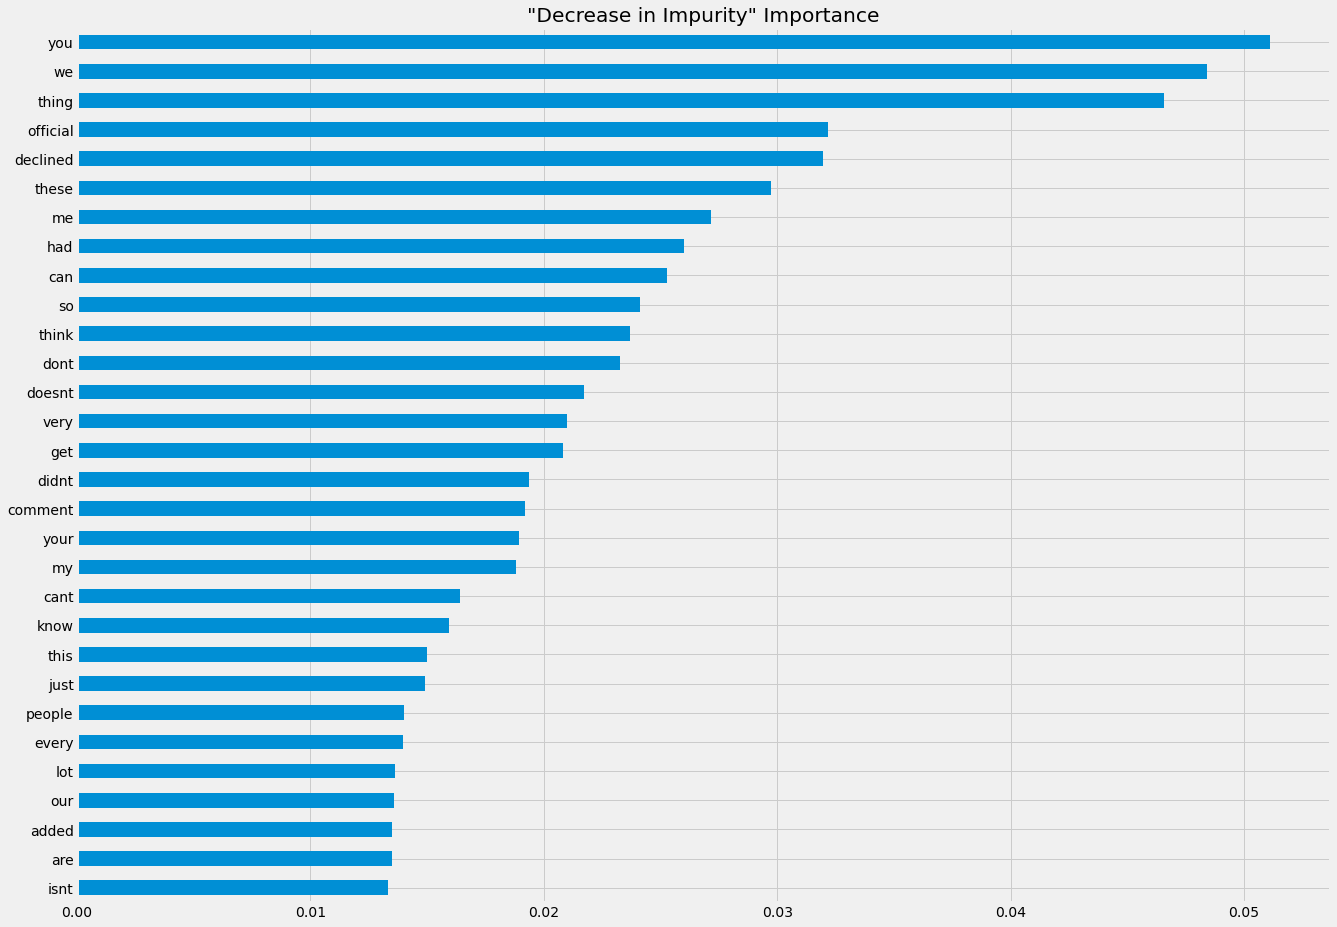

In [52]:
%%time
print(datetime.datetime.now())

feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

feat_scores = pd.Series(feature_import, index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-30:].plot(kind='barh', figsize=(20,15))
ax.set_title('"Decrease in Impurity" Importance')
#ax.set_xlabel('Average contribution to the reduction in variance')
plt.rcParams.update({'font.size': 40})
plt.savefig('img/feature_imporance.png');

In [53]:
feat_scores[-100:].index

Index(['host', 'almost', 'secretary', 'plan', 'doubt', 'payment', 'recalled',
       'appeared', 'put', 'professor', 'initially', 'meeting', 'criticism',
       'earlier', 'expected', 'always', 'billion', 'whether', 'adding',
       'after', 'going', 'go', 'course', 'hard', 'including', 'but', 'may',
       'everything', 'scheduled', 'what', 'no', 'got', 'lawmaker', 'never',
       'mean', 'like', 'life', 'seem', 'right', 'want', 'fact', 'too',
       'according', 'senior', 'make', 'be', 'really', 'understand', 'bad',
       'should', 'something', 'director', 'true', 'even', 'why', 'today',
       'real', 'request', 'now', 'several', 'do', 'statement', 'thats',
       'interview', 'need', 'man', 'look', 'way', 'month', 'good', 'isnt',
       'are', 'added', 'our', 'lot', 'every', 'people', 'just', 'this', 'know',
       'cant', 'my', 'your', 'comment', 'didnt', 'get', 'very', 'doesnt',
       'dont', 'think', 'so', 'can', 'had', 'me', 'these', 'declined',
       'official', 'thing', 'w

In [54]:
count_df = df[['text', 'type_of_material']]
oped = count_df[count_df['type_of_material'] == "Op-Ed"]
news = count_df[count_df['type_of_material'] == "News"]

In [55]:
print(oped.shape)
print(news.shape)

(3191, 2)
(14592, 2)


In [56]:
oped_string = oped.text.str.cat(sep = " ")
num_oped_string = len(oped_string)
print(num_oped_string)

14006924


In [57]:
news_string = news.text.str.cat(sep = " ")
num_news_string = len(news_string)
print(num_news_string)

71931567


# counting

In [58]:
top_feat = feat_scores[-100:].index

In [59]:
%%time
#count top words in oped_string
oped_list = [word for word in oped_string.split() if word in list(top_feat)]
oped_ed_counter = Counter(oped_list)
oped_ed_counter.items()

CPU times: user 15.6 s, sys: 46.8 ms, total: 15.7 s
Wall time: 15.7 s


dict_items([('these', 2597), ('including', 1171), ('what', 5203), ('very', 1609), ('dont', 2061), ('think', 1828), ('we', 6856), ('know', 2024), ('get', 2524), ('people', 6501), ('this', 9884), ('going', 1540), ('so', 4837), ('good', 1782), ('had', 5921), ('really', 1152), ('thing', 1146), ('you', 5045), ('are', 13368), ('after', 2586), ('make', 2556), ('be', 13938), ('why', 1378), ('even', 4507), ('fact', 1340), ('should', 3214), ('no', 4281), ('now', 3712), ('do', 3941), ('put', 1311), ('life', 1211), ('man', 1253), ('isnt', 1247), ('cant', 1085), ('your', 1388), ('can', 4943), ('but', 7814), ('want', 1631), ('way', 3001), ('course', 1084), ('adding', 143), ('just', 4147), ('too', 2054), ('my', 2675), ('our', 5693), ('understand', 613), ('like', 5265), ('seem', 830), ('never', 1647), ('expected', 251), ('me', 2416), ('true', 870), ('statement', 276), ('request', 76), ('right', 2319), ('may', 2480), ('whether', 1275), ('secretary', 581), ('several', 444), ('doubt', 300), ('need', 1805

In [60]:
%%time
#count top words in news string
news_list = [word for word in news_string.split() if word  in list(top_feat)]
news_counter = Counter(news_list)
news_counter.items()

CPU times: user 1min 19s, sys: 203 ms, total: 1min 19s
Wall time: 1min 19s


dict_items([('you', 3496), ('but', 27157), ('had', 60883), ('man', 2268), ('very', 2090), ('just', 7993), ('be', 47790), ('added', 7862), ('course', 1952), ('our', 1572), ('like', 16433), ('this', 20804), ('something', 2268), ('so', 10813), ('after', 25148), ('now', 10924), ('get', 4913), ('know', 2205), ('we', 1892), ('official', 7315), ('what', 14553), ('right', 3205), ('these', 3230), ('no', 12918), ('are', 40104), ('expected', 4506), ('even', 13439), ('do', 8013), ('meeting', 7123), ('interview', 7566), ('going', 2328), ('real', 2192), ('director', 8102), ('me', 1809), ('whether', 10850), ('too', 4661), ('look', 1740), ('isnt', 491), ('including', 14821), ('make', 8218), ('according', 12355), ('think', 1996), ('put', 4805), ('should', 6859), ('doubt', 875), ('recalled', 1334), ('life', 2161), ('request', 2869), ('professor', 2589), ('never', 4109), ('why', 2270), ('can', 9545), ('month', 8549), ('criticism', 2663), ('good', 2101), ('hard', 1876), ('need', 3552), ('plan', 6321), ('c

# merge dictionary

In [61]:
%%time
#merge keys and values together.
# merge_dic.val[0] = news
# merge_dic.val[1] = oped

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merged_values_set = set(merged_values)
    merge_dic[key] = merged_values_set

CPU times: user 93 µs, sys: 1e+03 ns, total: 94 µs
Wall time: 96.1 µs


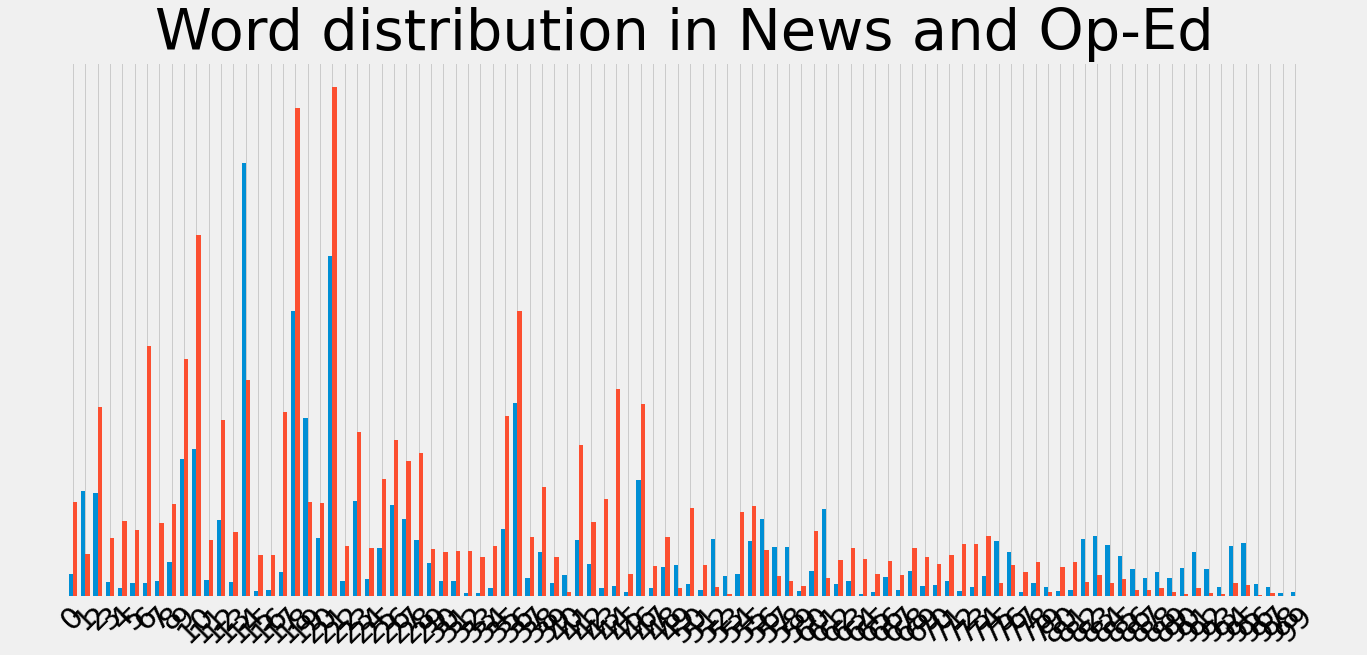

In [62]:
#plot of word distributions
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merge_dic[key] = merged_values

keys = []
news_counts = []
oped_counts = []
    
for k, v in merge_dic.items():
    keys.append(k)
    news_counts.append(v[0]/num_news_string)
    oped_counts.append(v[1]/num_oped_string)

x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, news_counts, width, label='News')
rects2 = ax.bar(x + width/2, oped_counts, width, label='Op-Ed')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Count')
ax.set_title('Word distribution in News and Op-Ed')
ax.set_xticks(x)
#ax.set_yscale('log')
# ax.set_xticklabels(keys)
# ax.legend()

plt.yticks([])
fig.tight_layout()
plt.xticks(rotation=45, fontsize=30)
plt.show();
# plt.savefig('img/word_dist.png');

# news/oped most common 

In [63]:
# %%time
# oped_list_features = [word for word in oped_string.split() if word in list(top_15)]
# oped_ed_count_total = Counter(oped_list_features)

In [64]:
# %%time
# news_list_features = [word for word in news_string.split() if word in list(top_15)]
# news_counter_total = Counter(news_list_features)

In [65]:
%%time
#list of words that are more news_words and are more oped_words
# merge_dic.val[0] = news
# merge_dic.val[1] = oped

news_words = []
oped_words = []

for k, v in merge_dic.items():
    if v[0]/num_news_string > v[1]/num_oped_string:
        news_words.append(k)
    else:
        oped_words.append(k)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 42.9 µs


In [66]:
print(len(news_words))
print(len(oped_words))

32
68


In [67]:
#top News Words
news_words

['including',
 'had',
 'after',
 'adding',
 'expected',
 'statement',
 'request',
 'whether',
 'secretary',
 'several',
 'according',
 'added',
 'plan',
 'host',
 'director',
 'month',
 'official',
 'billion',
 'appeared',
 'professor',
 'earlier',
 'criticism',
 'comment',
 'senior',
 'declined',
 'initially',
 'meeting',
 'interview',
 'scheduled',
 'recalled',
 'lawmaker',
 'payment']

In [68]:
#top Op-Ed Words
oped_words

['these',
 'what',
 'very',
 'dont',
 'think',
 'we',
 'know',
 'get',
 'people',
 'this',
 'going',
 'so',
 'good',
 'really',
 'thing',
 'you',
 'are',
 'make',
 'be',
 'why',
 'even',
 'fact',
 'should',
 'no',
 'now',
 'do',
 'put',
 'life',
 'man',
 'isnt',
 'cant',
 'your',
 'can',
 'but',
 'want',
 'way',
 'course',
 'just',
 'too',
 'my',
 'our',
 'understand',
 'like',
 'seem',
 'never',
 'me',
 'true',
 'right',
 'may',
 'doubt',
 'need',
 'look',
 'something',
 'thats',
 'everything',
 'almost',
 'mean',
 'go',
 'always',
 'got',
 'real',
 'doesnt',
 'didnt',
 'every',
 'today',
 'hard',
 'bad',
 'lot']

In [69]:
print(num_oped_string)
print(num_news_string)

14006924
71931567


### permutation importance

In [70]:
# %%time
# print(datetime.datetime.now())
# r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)

In [71]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [72]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<20}")
# #               f"{r.importances_mean[i]:.3f}"
# #               f" +/- {r.importances_std[i]:.3f}")

In [73]:
len(feat_names)

1190

# make a plot

# min_df_plot

In [74]:
%%time
print(datetime.datetime.now())
num_feat_min = []

min_df = np.linspace(0.01,0.3,6)

for val in min_df:
    vectorizer_plot = TfidfVectorizer(preprocessor=functions.punc_strip,
#                 tokenizer=wordnet_tokenize,
                stop_words=alphabet,
#                 max_df=0.95,
                 min_df=val,
                 max_features=None)
    
    vectorizer_plot.fit(X)
    
    features = vectorizer_plot.get_feature_names()
    stop_word = vectorizer_plot.get_stop_words()

    num_feat_min.append(len(features))

2021-04-08 13:02:48.779870
CPU times: user 5min 2s, sys: 1.29 s, total: 5min 3s
Wall time: 5min 4s


CPU times: user 16.8 ms, sys: 1.68 ms, total: 18.5 ms
Wall time: 17.4 ms


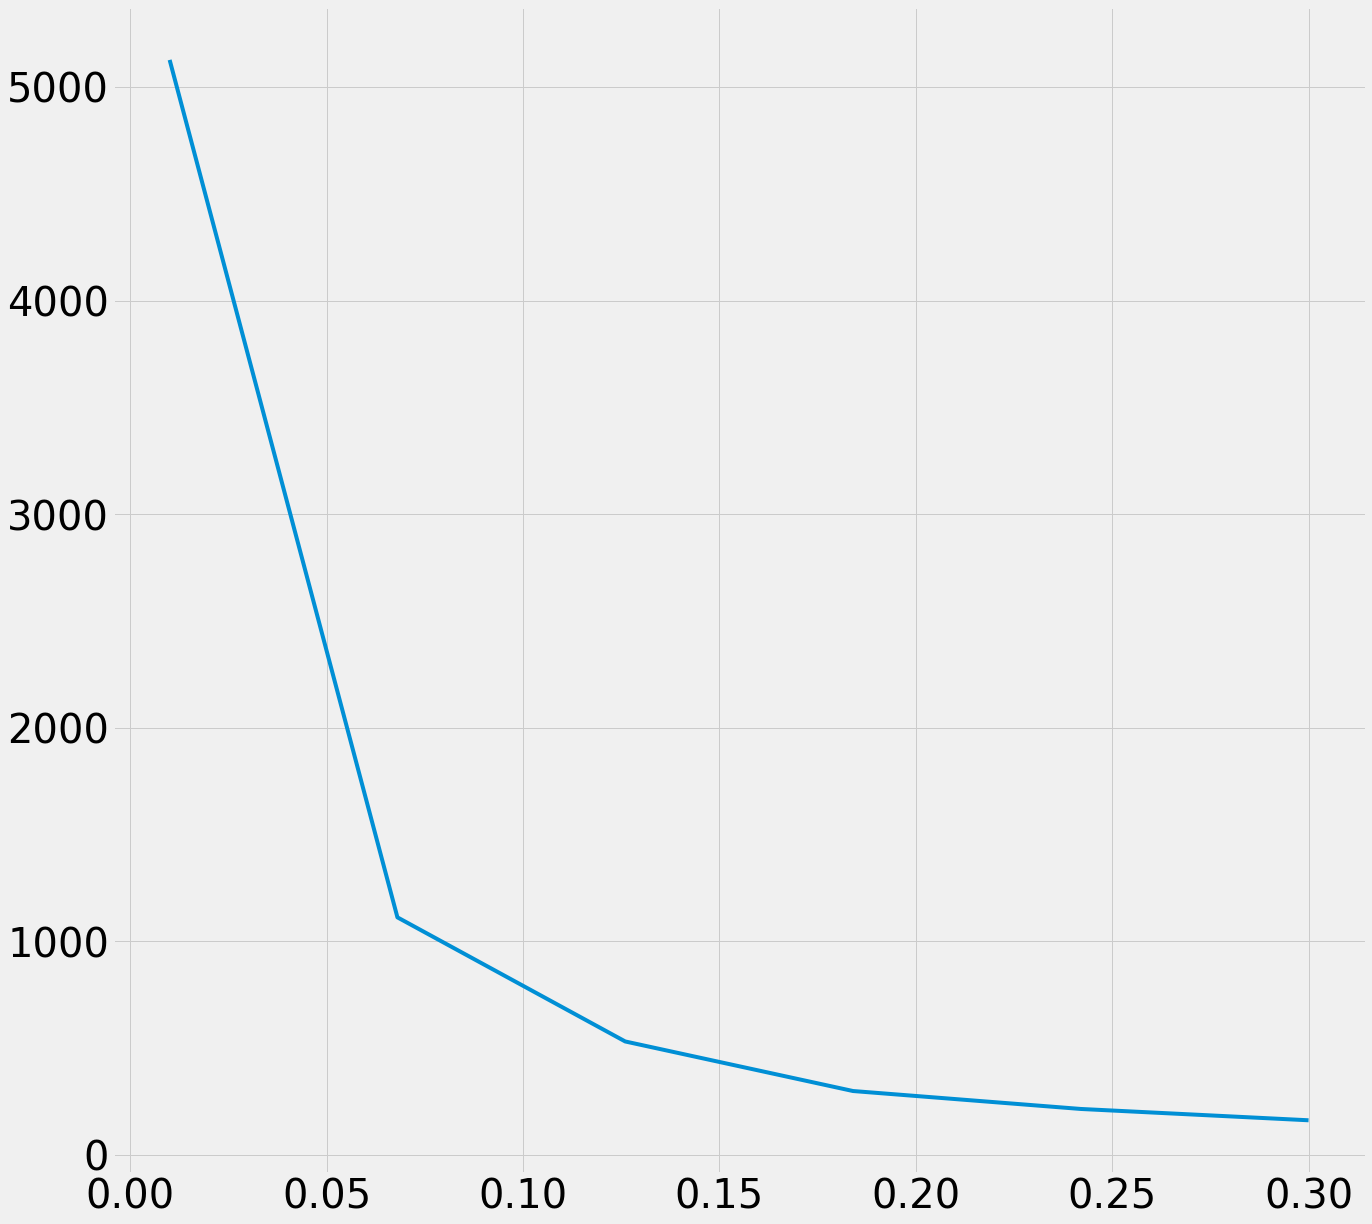

In [75]:
%%time
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(min_df, num_feat_min);

In [76]:
%%time
print(datetime.datetime.now())
learn_vect = TfidfVectorizer(preprocessor=functions.punc_strip,
                 tokenizer=wordnet_tokenize,
#            stop_words=alphabet,
#                max_df=0.95,
             min_df=.06,
             max_features=None)

learn_vect.fit(X)

min_df_features = learn_vect.get_feature_names()
stop_word = learn_vect.get_stop_words()

2021-04-08 13:07:53.346677


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CPU times: user 2min 8s, sys: 384 ms, total: 2min 9s
Wall time: 2min 9s


In [77]:
len(min_df_features)

1222

In [78]:
min_df_features

['000',
 '1',
 '10',
 '100',
 '11',
 '12',
 '14',
 '15',
 '18',
 '2',
 '20',
 '200',
 '2008',
 '2010',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '25',
 '3',
 '30',
 '4',
 '40',
 '5',
 '50',
 '500',
 '6',
 '60',
 '7',
 '8',
 '9',
 'a',
 'ability',
 'able',
 'about',
 'abuse',
 'access',
 'according',
 'account',
 'accusation',
 'accused',
 'acknowledged',
 'across',
 'act',
 'acting',
 'action',
 'activist',
 'activity',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'advance',
 'advantage',
 'adviser',
 'advocate',
 'affair',
 'after',
 'afternoon',
 'again',
 'against',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'aide',
 'aimed',
 'air',
 'all',
 'allegation',
 'allow',
 'allowed',
 'allowing',
 'ally',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'ambassador',
 'amid',
 'among',
 'amount'

# max_features

In [79]:
# num_feat = np.linspace(.7,.99,6)

In [80]:
# num_feat

In [81]:
# %%time
# TN = []
# FP = []
# FN = []
# TP = []

# num_feat = np.linspace(1000,50000,6)
# max_df = np.linspace(.7,.99,6)
# min_df = np.linspace(0,.3,6)


# for val in max_df:
#     vectorizer_plot = TfidfVectorizer(preprocessor=functions.punc_strip,
# #                 tokenizer=wordnet_tokenize,
#                 stop_words=alphabet,
#                  max_df=val,
# #                 min_df=val,
#                  max_features=None

#     #test, train, split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

#     X_train = vectorizer_plot.fit_transform(X_train)

#     X_test = vectorizer_plot.transform(X_test)
    
#     #X, y --> X_resampled, y_resampled
#     rus = RandomUnderSampler(random_state=0)
#     X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
#     recall_rfc = RandomForestClassifier(max_depth=2, random_state=0)

#     rf_clf.fit(X_resampled, y_resampled)
#     y_pred = rf_clf.predict(X_test)
    
#     tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
#     #.ravel() make a 1d matrix into flat array
#     a, r, p  = functions.metrics_(tn, fp, fn, tp)
    
#     TN.append(tn)
#     FP.append(fp)
#     FN.append(fn)
#     TP.append(tp)
    
    
#     num_feat_min.append(len(features))

In [82]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)
    
# fig, ax = plt.subplots()
# ax.plot(features, scores)

In [83]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)

In [84]:
# #stacked bar graph

# video_sales_df = pd.read_excel("data.xlsx")

# regional_genre = video_sales_df.groupby(['Genre'],as_index=False)["NA_Sales","EU_Sales","JP_Sales"].sum()[:5]
# columns = ["NA_Sales","EU_Sales","JP_Sales"]

# # Normalization parameters
# normalize_min = 0.1
# normalize_max = 1

# # Normalize
# regional_genre[columns]= preprocessing.minmax_scale(regional_genre[columns], feature_range=(normalize_min, normalize_max))

# # Plot stacked bars
# plt.bar(regional_genre["Genre"], regional_genre["NA_Sales"], label="NA_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["EU_Sales"], bottom=regional_genre["NA_Sales"], label="EU_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["JP_Sales"], bottom=regional_genre["EU_Sales"]+regional_genre["NA_Sales"], label="JP_Sales")
# plt.legend()
# plt.ylabel("Normalized sales")
# plt.show()

# # Another solution for plot:

# plt.bar(columns, regional_genre.ix[0,1:], label="Action")
# bot = regional_genre.ix[0,1:]
# plt.bar(columns, regional_genre.ix[1,1:], bottom=bot, label="Adventure")
# bot += regional_genre.ix[1,1:]
# plt.bar(columns, regional_genre.ix[2,1:], bottom=bot, label="Fighting")
# bot += regional_genre.ix[2,1:]
# plt.bar(columns, regional_genre.ix[3,1:], bottom=bot, label="Misc")
# bot += regional_genre.ix[3,1:]
# plt.bar(columns, regional_genre.ix[4,1:], bottom=bot, label="Platform")

# xgboost

In [56]:
import xgboost as xgb

In [57]:
D_train = xgb.DMatrix(X_resampled, label=y_resampled)
D_test = xgb.DMatrix(X_test, label=y_test)

In [58]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [59]:
model = xgb.train(param, D_train, steps)

[13:21:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.883180186138801
Recall = 0.9360448569868538
Accuracy = 0.9394961763382816


In [ ]:
from sklearn.model_selection import GridSearchCV

xgBOOST_clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(xgBOOST_clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

In [ ]:
%%time
print(datetime.datetime.now())
grid.fit(X_train, y_resampled)
# y_pred = rf_clf.predict(X_test)
# y_pred.shape)